# Вариант Г


In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import sympy as sp
from scipy.optimize import curve_fit

## Составляем матрицу А

In [83]:
n = 100
A = np.full((n, n), 0, dtype = 'float64')

for i in range(n):
    A[0][i] = 1

for i in range(1, n - 1):
    A[i][i - 1] = 1
    A[i][i]     = 10
    A[i][i + 1] = 1

A[n - 1][-1] = 1
A[n - 1][-2] = 1

F = np.arange(n, 0, -1) 


print(A, F, sep='\n\n')

[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1. 10.  1. ...  0.  0.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 10.  1.  0.]
 [ 0.  0.  0. ...  1. 10.  1.]
 [ 0.  0.  0. ...  0.  1.  1.]]

[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]


## Метод Гаусса


In [84]:
A_gaus = np.concatenate([A, F[:, None]], axis=1)

N = 100


def printmat(mat):
    for row in mat:
        for num in row:
            print(f"{num:.4f}", end=' ')
        print()



def gaussianElimination(mat):
 
    singular_flag = forwardElim(mat)
 
    if (singular_flag != -1):
 
        print("Вырожденная матрица.")
 

        if (mat[singular_flag][N]):
            print("Две разные строки с одинаковыми свободными членами.")
        else:
            print("Может быть бесконечное кол-во решений")
 
        return
 
    return backSub(mat)

def swap_row(mat, i, j):
 
    for k in range(N + 1):
 
        temp = mat[i][k]
        mat[i][k] = mat[j][k]
        mat[j][k] = temp
 
def forwardElim(mat):
    for k in range(N):
       
        i_max = k
        v_max = mat[i_max][k]
 
        for i in range(k + 1, N):
            if (abs(mat[i][k]) > abs(v_max)):
                v_max = mat[i][k]
                i_max = i
 

        if not mat[k][i_max]:
            return k    
 
        if (i_max != k):
            swap_row(mat, k, i_max)
 
        for i in range(k + 1, N):
 
            f = mat[i][k]/mat[k][k]

            for j in range(k + 1, N + 1):
                mat[i][j] -= mat[k][j]*f
 
            mat[i][k] = 0
 
 
    return -1
 
def backSub(mat):
 
    x = [None for _ in range(N)]  

    for i in range(N-1, -1, -1):

        x[i] = mat[i][N]
 
        for j in range(i + 1, N):
            x[i] -= mat[i][j]*x[j]
 
        x[i] = (x[i]/mat[i][i])
 
    print("\nРешение системы:")
    for i in range(N):
        print("{:.8f}".format(x[i]))

    return x


X = gaussianElimination(A_gaus)



print("\n\nНевязка прямого метода:", np.linalg.norm(F - A.dot(X), ord = 2))


Решение системы:
-345.74502771
44.01917818
4.55324589
8.44836296
7.96312452
7.92039185
7.83295701
7.75003802
7.66666283
7.58333372
7.49999996
7.41666667
7.33333333
7.25000000
7.16666667
7.08333333
7.00000000
6.91666667
6.83333333
6.75000000
6.66666667
6.58333333
6.50000000
6.41666667
6.33333333
6.25000000
6.16666667
6.08333333
6.00000000
5.91666667
5.83333333
5.75000000
5.66666667
5.58333333
5.50000000
5.41666667
5.33333333
5.25000000
5.16666667
5.08333333
5.00000000
4.91666667
4.83333333
4.75000000
4.66666667
4.58333333
4.50000000
4.41666667
4.33333333
4.25000000
4.16666667
4.08333333
4.00000000
3.91666667
3.83333333
3.75000000
3.66666667
3.58333333
3.50000000
3.41666667
3.33333333
3.25000000
3.16666667
3.08333333
3.00000000
2.91666667
2.83333333
2.75000000
2.66666667
2.58333333
2.50000000
2.41666667
2.33333333
2.25000000
2.16666667
2.08333333
2.00000000
1.91666667
1.83333333
1.75000000
1.66666667
1.58333333
1.50000000
1.41666667
1.33333333
1.25000000
1.16666667
1.08333333
1.00000000

## LU-разложение

In [85]:
matrix_size = n

L = np.eye(matrix_size, dtype = 'float64')
U = np.full((matrix_size, matrix_size), 0, dtype = 'float64')

for i in range(matrix_size):
    for j in range(matrix_size):
        if i <= j:
            U[i, j] = A[i, j]
            for k in range(i):
                U[i, j] -= L[i, k] * U[k, j]
        else:
            L[i, j] = 1 / U[j, j] * A[i, j]
            for k in range(j):
                L[i, j] -= 1 / U[j, j] * L[i, k] * U[k, j]

print(L, U, sep = '\n\n')

[[1.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.11111111 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.10102051 1.         0.        ]
 [0.         0.         0.         ... 0.         0.10102051 1.        ]]

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  9.00000000e+00  0.00000000e+00 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+01 ...  1.11111111e-01
   1.11111111e-01  1.11111111e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.89897949e+00
   1.00000000e+00 -2.88841690e-96]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   9.89897949e+00  1.00000000e+00]
 [ 0.00000000e+00  0.0000

### Ly = f; Ux = y

In [86]:
y = np.zeros(n)

for i in range(n):
    y[i] = F[i]
    for j in range(i):
        y[i] -= L[i, j] * y[j]
    y[i] /=  L[i, i]

x = np.zeros(n)

for i in range(n - 1, -1, -1):
    x[i] = y[i]
    for j in range(n - 1, i, -1):
        x[i] -= U[i, j] * x[j]
    x[i] /= U[i, i]

F_ = A.dot(x)


print("Решение СЛАУ Ax = F:", x, sep = '\n\n')
print("\n\nНевязка прямого метода:", np.linalg.norm(F - A.dot(x), ord = 2))

Решение СЛАУ Ax = F:

[-3.45745028e+02  4.40191782e+01  4.55324589e+00  8.44836296e+00
  7.96312452e+00  7.92039185e+00  7.83295701e+00  7.75003802e+00
  7.66666283e+00  7.58333372e+00  7.49999996e+00  7.41666667e+00
  7.33333333e+00  7.25000000e+00  7.16666667e+00  7.08333333e+00
  7.00000000e+00  6.91666667e+00  6.83333333e+00  6.75000000e+00
  6.66666667e+00  6.58333333e+00  6.50000000e+00  6.41666667e+00
  6.33333333e+00  6.25000000e+00  6.16666667e+00  6.08333333e+00
  6.00000000e+00  5.91666667e+00  5.83333333e+00  5.75000000e+00
  5.66666667e+00  5.58333333e+00  5.50000000e+00  5.41666667e+00
  5.33333333e+00  5.25000000e+00  5.16666667e+00  5.08333333e+00
  5.00000000e+00  4.91666667e+00  4.83333333e+00  4.75000000e+00
  4.66666667e+00  4.58333333e+00  4.50000000e+00  4.41666667e+00
  4.33333333e+00  4.25000000e+00  4.16666667e+00  4.08333333e+00
  4.00000000e+00  3.91666667e+00  3.83333333e+00  3.75000000e+00
  3.66666667e+00  3.58333333e+00  3.50000000e+00  3.41666667e+00
  3

## Метод верхней релаксации

In [87]:
D = np.diag(np.diag(A))
L = np.tril(A) - D
U = np.triu(A) - D

x = np.zeros(n)
omega = 1
eps = 1e-12

B   = (- np.linalg.inv(D + omega * L)).dot((omega - 1) * D + omega * U)
F_b = omega * (np.linalg.inv(D + omega * L)).dot(F)

k = 0

while (np.linalg.norm(F - A.dot(x), ord = 2) > eps):
    x = B.dot(x) + F_b
    k += 1

print("Критерий остановки цикла: невязка < eps = 1e-12")
print("Итераций до заданной точности:", k)
print(x)
print("Невязка: ", np.linalg.norm(F - A.dot(x), ord = 2))



Критерий остановки цикла: невязка < eps = 1e-12
Итераций до заданной точности: 16
[-3.45745028e+02  4.40191782e+01  4.55324589e+00  8.44836296e+00
  7.96312452e+00  7.92039185e+00  7.83295701e+00  7.75003802e+00
  7.66666283e+00  7.58333372e+00  7.49999996e+00  7.41666667e+00
  7.33333333e+00  7.25000000e+00  7.16666667e+00  7.08333333e+00
  7.00000000e+00  6.91666667e+00  6.83333333e+00  6.75000000e+00
  6.66666667e+00  6.58333333e+00  6.50000000e+00  6.41666667e+00
  6.33333333e+00  6.25000000e+00  6.16666667e+00  6.08333333e+00
  6.00000000e+00  5.91666667e+00  5.83333333e+00  5.75000000e+00
  5.66666667e+00  5.58333333e+00  5.50000000e+00  5.41666667e+00
  5.33333333e+00  5.25000000e+00  5.16666667e+00  5.08333333e+00
  5.00000000e+00  4.91666667e+00  4.83333333e+00  4.75000000e+00
  4.66666667e+00  4.58333333e+00  4.50000000e+00  4.41666667e+00
  4.33333333e+00  4.25000000e+00  4.16666667e+00  4.08333333e+00
  4.00000000e+00  3.91666667e+00  3.83333333e+00  3.75000000e+00
  3.6666

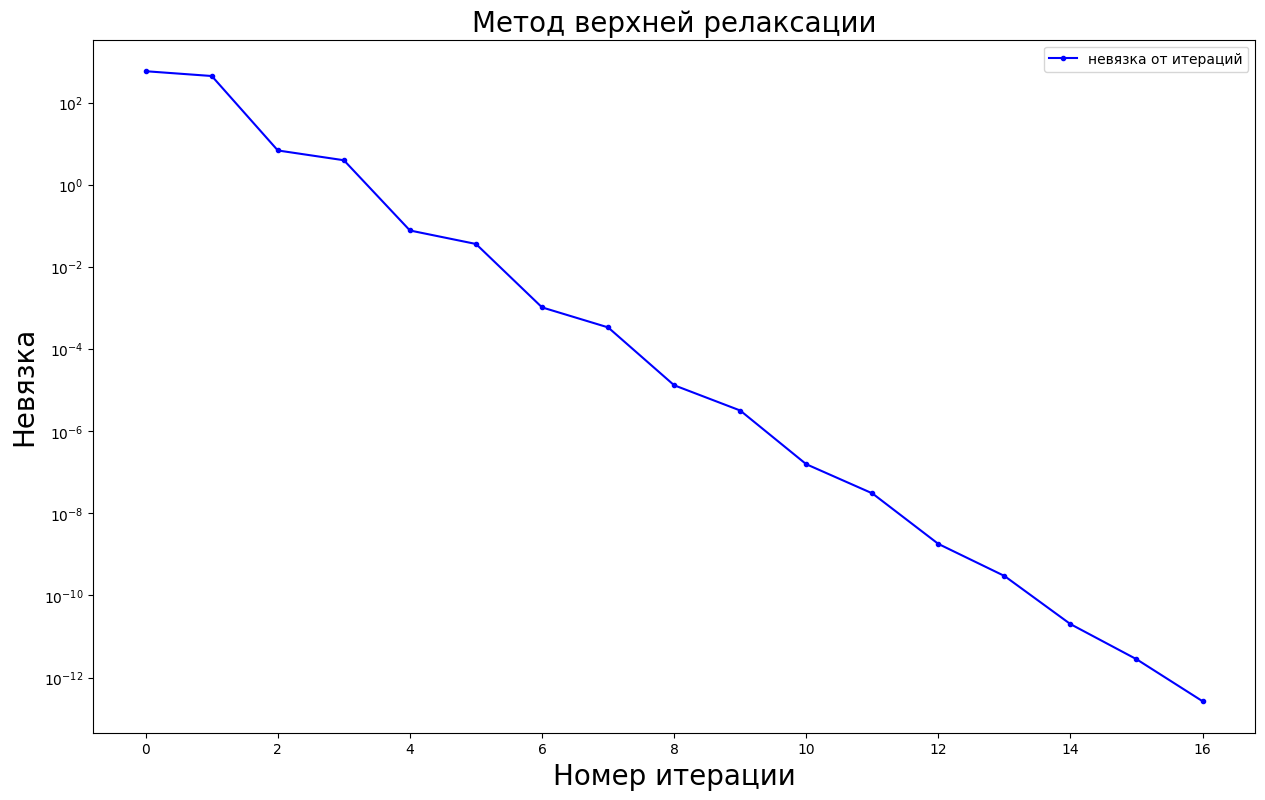

In [88]:
x = np.zeros(n)


x_data = []
y_data = []

for i in range(k + 1):
    x_data.append(i)
    y_data.append(np.linalg.norm(F - A.dot(x), ord = 2))
    x = B.dot(x) + F_b


size_x = 15
size_y = 9
plt.figure (figsize=(size_x, size_y))


ax = plt.gca ()
plt.yscale("log")
ax.set_title('Метод верхней релаксации', size=20)
ax.set_xlabel (r"Номер итерации", fontsize = 20)
ax.set_ylabel (r"Невязка", fontsize = 20)

plt.plot(x_data, y_data, marker = ".", color = 'blue', label = 'невязка от итераций')
plt.legend(loc='best')

plt.show()

## Метод Зейделя

In [89]:
eps = 1e-12

x = np.zeros(n)
k = 0


converge = False
while not converge:
    x_new = np.copy(x)
    for i in range(n):
        s1 = sum(A[i][j] * x_new[j] for j in range(i))
        s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x_new[i] = (F[i] - s1 - s2) / A[i][i]
    
    x = x_new
    converge = np.linalg.norm(F - A.dot(x), ord = 2) <= eps
    k+= 1

print("Критерий остановки цикла: невязка < eps = 1e-12")
print("Итераций до заданной точности:", k)
print(x)
print("Невязка: ", np.linalg.norm(F - A.dot(x), ord = 2))


Критерий остановки цикла: невязка < eps = 1e-12
Итераций до заданной точности: 16
[-3.45745028e+02  4.40191782e+01  4.55324589e+00  8.44836296e+00
  7.96312452e+00  7.92039185e+00  7.83295701e+00  7.75003802e+00
  7.66666283e+00  7.58333372e+00  7.49999996e+00  7.41666667e+00
  7.33333333e+00  7.25000000e+00  7.16666667e+00  7.08333333e+00
  7.00000000e+00  6.91666667e+00  6.83333333e+00  6.75000000e+00
  6.66666667e+00  6.58333333e+00  6.50000000e+00  6.41666667e+00
  6.33333333e+00  6.25000000e+00  6.16666667e+00  6.08333333e+00
  6.00000000e+00  5.91666667e+00  5.83333333e+00  5.75000000e+00
  5.66666667e+00  5.58333333e+00  5.50000000e+00  5.41666667e+00
  5.33333333e+00  5.25000000e+00  5.16666667e+00  5.08333333e+00
  5.00000000e+00  4.91666667e+00  4.83333333e+00  4.75000000e+00
  4.66666667e+00  4.58333333e+00  4.50000000e+00  4.41666667e+00
  4.33333333e+00  4.25000000e+00  4.16666667e+00  4.08333333e+00
  4.00000000e+00  3.91666667e+00  3.83333333e+00  3.75000000e+00
  3.6666

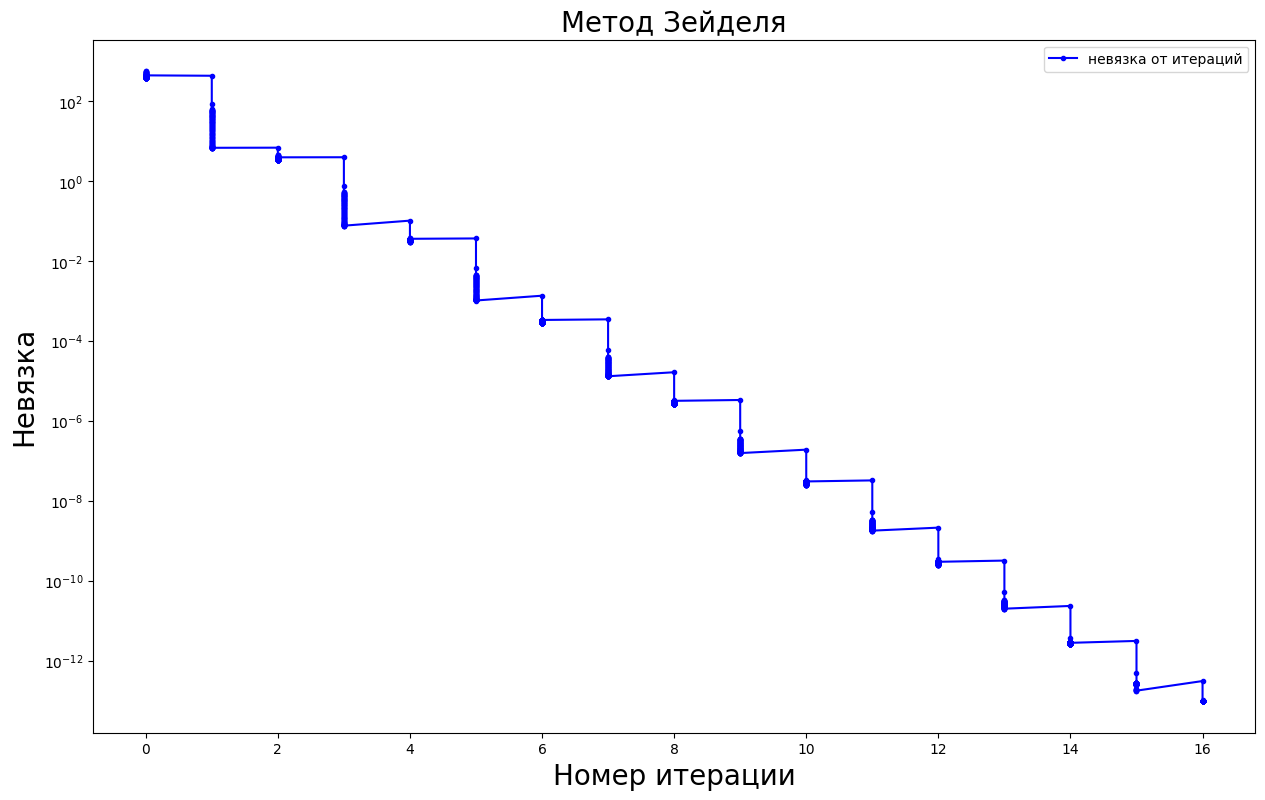

In [90]:
x_data = []
y_data = []

x = np.zeros(n)


for j in range(k + 1):
    x_new = np.copy(x)
    for i in range(n):
        s1 = sum(A[i][j] * x_new[j] for j in range(i))
        s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x_new[i] = (F[i] - s1 - s2) / A[i][i]
        x_data.append(j)
        y_data.append(np.linalg.norm(F - A.dot(x_new), ord = 2))
    x = x_new

ize_x = 15
size_y = 9
plt.figure (figsize=(size_x, size_y))

plt.yscale("log")
ax = plt.gca ()
ax.set_title('Метод Зейделя', size=20)
ax.set_xlabel (r"Номер итерации", fontsize = 20)
ax.set_ylabel (r"Невязка", fontsize = 20)

plt.plot(x_data, y_data, marker = ".", color = 'blue', label = 'невязка от итераций')
plt.legend(loc='best')

plt.show()

    


## Метод Якоби

In [91]:
eps = 1e-12

D = np.diag(A)
R = A - np.diagflat(D)

x = np.zeros(n)
k = -1
converge = False

while not converge:
    x = (F - np.dot(R, x)) / D
    converge = np.linalg.norm(F - A.dot(x), ord = 2) <= eps
    k+= 1


print("Критерий остановки цикла: невязка < eps = 1e-12")
print("Итераций до заданной точности:", k)
print(x)
print("Невязка: ", np.linalg.norm(F - A.dot(x), ord = 2))

Критерий остановки цикла: невязка < eps = 1e-12
Итераций до заданной точности: 37
[-3.45745028e+02  4.40191782e+01  4.55324589e+00  8.44836296e+00
  7.96312452e+00  7.92039185e+00  7.83295701e+00  7.75003802e+00
  7.66666283e+00  7.58333372e+00  7.49999996e+00  7.41666667e+00
  7.33333333e+00  7.25000000e+00  7.16666667e+00  7.08333333e+00
  7.00000000e+00  6.91666667e+00  6.83333333e+00  6.75000000e+00
  6.66666667e+00  6.58333333e+00  6.50000000e+00  6.41666667e+00
  6.33333333e+00  6.25000000e+00  6.16666667e+00  6.08333333e+00
  6.00000000e+00  5.91666667e+00  5.83333333e+00  5.75000000e+00
  5.66666667e+00  5.58333333e+00  5.50000000e+00  5.41666667e+00
  5.33333333e+00  5.25000000e+00  5.16666667e+00  5.08333333e+00
  5.00000000e+00  4.91666667e+00  4.83333333e+00  4.75000000e+00
  4.66666667e+00  4.58333333e+00  4.50000000e+00  4.41666667e+00
  4.33333333e+00  4.25000000e+00  4.16666667e+00  4.08333333e+00
  4.00000000e+00  3.91666667e+00  3.83333333e+00  3.75000000e+00
  3.6666

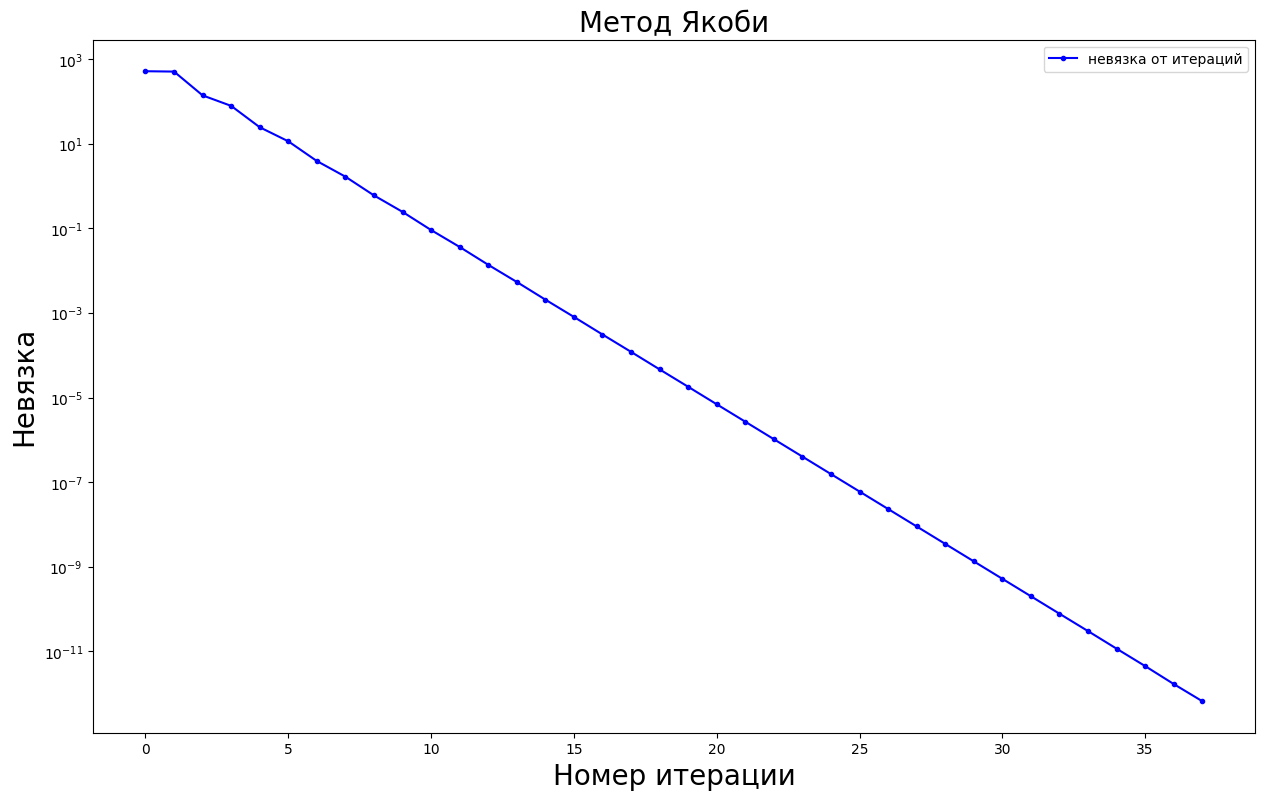

In [92]:
x_data = []
y_data = []

x = np.zeros(n)


for i in range(k + 1):
    x_data.append(i)
    x = (F - np.dot(R, x)) / D
    y_data.append(np.linalg.norm(F - A.dot(x), ord = 2))


size_x = 15
size_y = 9
plt.figure (figsize=(size_x, size_y))


ax = plt.gca ()
ax.set_title('Метод Якоби', size=20)
ax.set_xlabel (r"Номер итерации", fontsize = 20)
ax.set_ylabel (r"Невязка", fontsize = 20)
plt.yscale("log")

plt.plot(x_data, y_data, marker = ".", color = 'blue', label = 'невязка от итераций')
plt.legend(loc='best')

plt.show()